In [49]:
import numpy as np
import ctypes
import numba as nb
import time
from matplotlib import pyplot as plt
import pandas as pd
from ctypes import cdll 
from ctypes.util import find_library   

In [50]:
#python routine to help show how broken the C 
#standard library random number generator is.
#generate a bunch of random triples.  If plotted
#correctly, it becomes obvious they aren't 
#anywhere close to random.
 
theDll = find_library('libc.dylib')
mylib = cdll.LoadLibrary(theDll)
# do stuff with lib


#mylib=ctypes.cdll.LoadLibrary("libc.dylib")
rand=mylib.rand
rand.argtypes=[]
rand.restype=ctypes.c_int


@nb.njit
def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=rand()
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec


n=30000000
vec=get_rands(n*3)
#vv=vec&(2**16-1)

vv=np.reshape(vec,[n,3])
vmax=np.max(vv,axis=1)

maxval=1e8
vv2=vv[vmax<maxval,:]

f=open('rand_points.txt','w')
for i in range(vv2.shape[0]):
    myline=repr(vv2[i,0])+' '+repr(vv2[i,1])+' '+ repr(vv2[i,2])+'\n'
    f.write(myline)
f.close()

In [51]:
df = pd.read_csv('rand_points.txt', delim_whitespace=True, names=["x", "y", "z"])

In [52]:
df

,x,y,z
0,89987618,31101220,85175619
1,67100928,44392755,71219802
2,14072007,7192609,24474018
3,4674764,36660571,21350321
4,26427689,18606993,88242886
...,...,...,...
3047,87966574,15245699,44741560
3048,56519754,25066313,97572390
3049,73418086,28189254,61655198
3050,93274949,32890998,30269427


In [53]:
X= np.asarray(df.x)
Y= np.asarray(df.y)
Z= np.asarray(df.z)

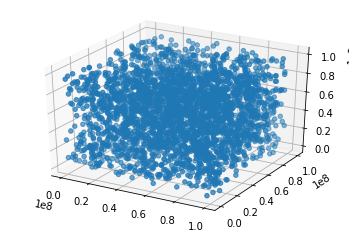

In [54]:
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, cmap='Greens')

plt.show()